In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

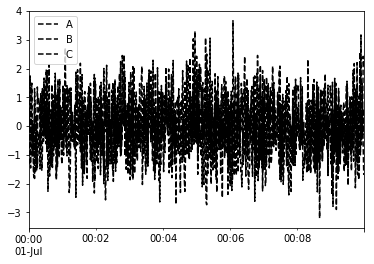

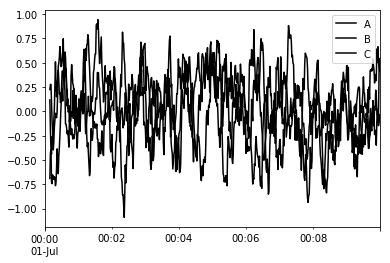

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,-0.383222,1.463777,0.010263
2016-07-01 00:00:02,-0.508309,1.571173,0.660292
2016-07-01 00:00:03,-0.793976,1.047923,0.709358
2016-07-01 00:00:04,-0.611379,0.643990,0.387381
2016-07-01 00:00:05,-0.555694,0.277520,0.638915
2016-07-01 00:00:06,-0.401903,0.001056,0.429414
2016-07-01 00:00:07,-0.363727,-0.131426,0.155176
2016-07-01 00:00:08,-0.589960,-0.123103,0.140783
2016-07-01 00:00:09,-0.791455,-0.099370,0.116320


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,-0.160351,-0.660744,-1.015231,1.155447
2016-06-07,-0.484489,-0.489657,0.745816,1.658925
2016-06-08,-1.339748,1.032526,-1.139900,0.601860
2016-06-09,1.574441,-0.097617,1.201915,0.151572
2016-06-10,0.448069,0.726803,-0.436122,0.194934


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ed4bd30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ece1e48>], dtype=object)

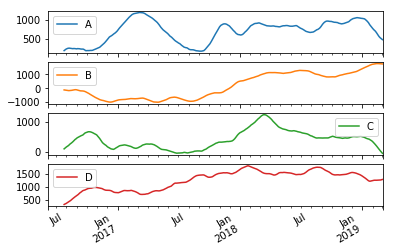

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.649206,0.649849,0.514325,0.914966


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.402596,-0.905572,-0.642323,1.984909
2016-06-08,-0.929926,-0.643006,-0.897987,2.462017
2016-06-09,-0.799981,-0.536127,-0.725340,2.738463
2016-06-10,-0.632401,-0.326639,-0.708976,2.943318


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

The expanding window is a more stable statistic than a rolling statistic since it tends to integrate all the values up to a certain point. The expanding window is more appropriate in situations where you do not want to place much emphasis on the shocks as they do not have too much of an impact in your analysis.

In [ ]:
# EWMA
# Why use EWMA?

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [11]:
import pandas_datareader as pdr
yahoo = pdr.get_data_yahoo('AAPL')
yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,27.083506,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.505054,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.552608,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.114347,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,27.064222,119282800


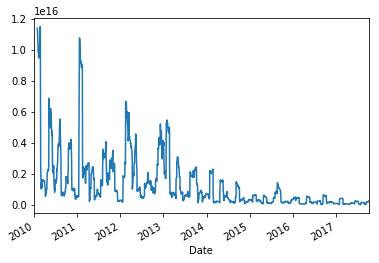

In [20]:
yahoo.rolling(20).var()['Volume'].plot()

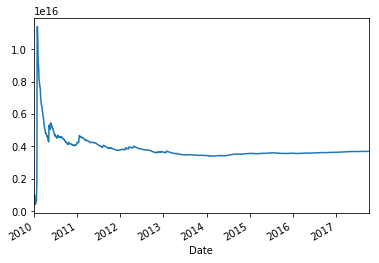

In [26]:
yahoo.expanding().var()['Volume'].plot()

The Expanding Plot is much more stable than the Rolling Window plot on account of aggregation of past values with equal weightage.